# Identify age-related conditions Competition


## Introduction 

This was the notebook that I used to submit my first competition in [kaggle](www.kaggle.com). The competition, hosted by ICR, focused on the identification of [Age-Related conditions](https://www.kaggle.com/competitions/icr-identify-age-related-conditions/overview). Kaggle provided an [example implementation using Tensorflow Decision Forests](https://www.kaggle.com/code/gusthema/identifying-age-related-conditions-w-tfdf/notebook).

![image](icr-competition.png)

<div class="alert alert-block alert-info">
<b>Goal of the Competition:</b> <br> 
The aim of this competition is to develop a predictive model for three specific medical conditions. Participants are tasked with predicting whether an individual has one or more of these conditions (Class 1), or none of them (Class 0). The model should be trained using health measurement data.
</div>

## Load training set 

Initially, we will proceed with loading the data. For this competition, a `train.csv` and a `greeks.csv` file are provided. The test set, available online via Kaggle, was utilized for competing on the public leaderboard.

Originally, this notebook was executed on Kaggle, hence the folder paths were set according to Kaggle’s server guidelines. These paths have since been adjusted to enable local execution of the code.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

TRAIN_SET_FILE = "./data/train.csv"
INDEX_COLUMN = 'Id'

df_icr = pd.read_csv(TRAIN_SET_FILE, index_col = INDEX_COLUMN)
df_icr.shape

(617, 57)

We see that we have a rather small dataset (617 rows) with a large number of columns (57).
We can examine the initial rows of the training set to gain a preliminary understanding of the dataset.

In [2]:
df_icr.head(10)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
04517a3c90bd,0.209377,2615.81430,85.200147,8.541526,8.138688,4.013127,0.025578,12.547282,1.229900,5237.54088,...,0.173229,0.49706,1.164956,21.915512,72.611063,24177.595550,28.525186,82.527764,21.978000,0
049232ca8356,0.348249,1733.65412,85.200147,8.377385,15.312480,1.913544,0.025578,6.547778,1.229900,5710.46099,...,4.408484,0.86130,0.467337,17.878444,192.453107,3332.467494,34.166222,100.086808,0.065096,0
057287f2da6d,0.269199,966.45483,85.200147,21.174189,8.138688,4.987617,0.025578,9.408886,1.229900,5040.77914,...,6.591896,0.49706,0.277693,18.445866,109.693986,21371.759850,35.208102,31.424696,0.092873,0
0594b00fb30a,0.346113,3238.43674,85.200147,28.888816,8.138688,4.021986,0.025578,8.243016,3.626448,6569.37001,...,4.762291,1.18262,0.067730,17.245908,147.218610,4589.611956,29.771721,54.675576,0.073416,0


We can see from the table that there are several columns, each representing a distinct measured feature. These features however are obfuscated, making it really difficult and sometimes impossible to determine which column corresponds to which actual measurement. Additionally, it’s noticeable that the values for each feature span various ranges.

As stated in the competition goal, our task is to utilize the information from these features to predict whether a patient has any of the three age-related conditions (Class 1) or none of these conditions (Class 0).

## Data preprocessing

Looking at the features from the train data, their mean and standard deviation appear to be very different in terms of range. Therefore, a good approach for using the different models later on will be to standardize or normalize all variables. Models work better with scaled variables as the optimization becomes more stable numerically. In fact, we might try both methods to see if they work.



In [3]:
# Identify nan values in columns
id_nan_cols = df_icr.columns[df_icr.isna().sum() > 0]
print("There are nan values in the following columns: ")
df_icr[id_nan_cols].isna().sum()

There are nan values in the following columns: 


BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64

We can see that there are 9 columns containing null values, from which only `BQ` and `EL` are the ones with most nan values (~10% of those).

We will transform the data by using a pipeline in which we will input the average value and then we will scale all the values between 0 and 1. 
By writing the pipeline, we should be able to apply the same for the test set.

We should also plot the correlation between variables, since many age related conditions might present similar features. In addition, we should plot the features as boxplots to check for outliers. 

Lastly, we need to check for the class output, to check if the dataset is imbalanced or not.
.

In [4]:

features = df_icr.columns.drop(target_variable).values
features

X_train = df_icr[features]
y_train = df_icr[target_variable]


NameError: name 'target_variable' is not defined

## EDA

In this section, we will be conducting a visual exploration of data distributions, correlations and potential trends. We will also investigate whether there is an imbalance in the classification class and quantify the number of missing values present in the dataset.

### Distribution of target variable

Let's examine whether the target variable `Class` is balanced or not:

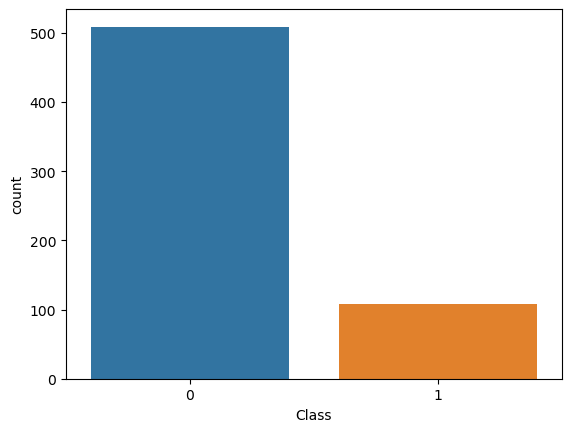

In [5]:
Y_VARIABLE = 'Class'

sns.countplot(x = df_icr[Y_VARIABLE])
sns.set_style("darkgrid")

Observing the data, we notice an imbalance with a ratio of 1:5. In the context of medical conditions, this is typical, as there are usually more individuals without the condition than those affected. It’s important to consider this during model training—whether to penalize incorrect predictions or explore the impact of balanced training data on performance.

### Identification of null-values

In addition, there are some variables that have null-values. We need to check how are those null-values for tsome variables to decide whether imputation of dropping entirely rows or columns is a better approach. In the next cell, we will identify null-values per feature.



In [6]:
# Identify nan values in columns
id_nan_cols = df_icr.columns[df_icr.isna().sum() > 0]
print("There are nan values in the following columns: ")
df_icr[id_nan_cols].isna().sum()

There are nan values in the following columns: 


BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64

We can see that there are 9 columns containing null values, from which only `BQ` and `EL` are the ones with most nan values (~10% of those).

We will transform the data by using a pipeline in which we will input the average value and then we will scale all the values between 0 and 1. 
By writing the pipeline, we should be able to apply the same for the test set.

We should also plot the correlation between variables, since many age related conditions might present similar features. In addition, we should plot the features as boxplots to check for outliers. 

Lastly, we need to check for the class output, to check if the dataset is imbalanced or not.

In [7]:
features = df_icr.columns.drop(Y_VARIABLE).values
print(features)

X_train = df_icr[features]
y_train = df_icr[Y_VARIABLE]

['AB' 'AF' 'AH' 'AM' 'AR' 'AX' 'AY' 'AZ' 'BC' 'BD ' 'BN' 'BP' 'BQ' 'BR'
 'BZ' 'CB' 'CC' 'CD ' 'CF' 'CH' 'CL' 'CR' 'CS' 'CU' 'CW ' 'DA' 'DE' 'DF'
 'DH' 'DI' 'DL' 'DN' 'DU' 'DV' 'DY' 'EB' 'EE' 'EG' 'EH' 'EJ' 'EL' 'EP'
 'EU' 'FC' 'FD ' 'FE' 'FI' 'FL' 'FR' 'FS' 'GB' 'GE' 'GF' 'GH' 'GI' 'GL']


### Correlations between features

Now it is time to explore how the features are distributed. We can do so through the following visualizations:

- Correlation plot
- Boxplots
- Histograms


/tmp/ipykernel_49989/298676056.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_features = df_icr.corr()


<Axes: >

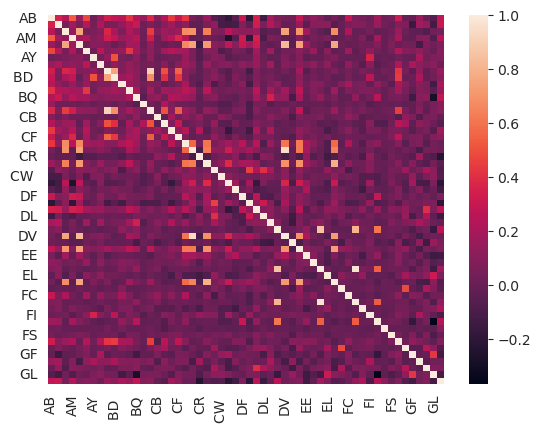

In [8]:
# Define correlation threshold
corr_threshold = 0

# Identify correlation in data
correlation_features = df_icr.corr()
correlation_signal = correlation_features[np.abs(correlation_features) > corr_threshold]
correlation_signal = correlation_signal.fillna(0)

low_correlation_columns =  correlation_signal.index[correlation_signal.sum(axis= 1) == 1]
sns.heatmap(correlation_features[np.abs(correlation_features) > corr_threshold])


In [9]:
sns.set_theme()
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
signal_correlation_columns = correlation_signal.index[correlation_signal.sum(axis= 1) > 1]
print(signal_correlation_columns)
num_signal_columns = len(signal_correlation_columns)
num_signal_columns 

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'EB', 'EE',
       'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FS', 'GB',
       'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')


53

To get an initial understanding of the features of the dataset, we can start by visualizing the distribution of the features. We can do so by running a histogram of all the numerical variables to see whether variables ar econtinuous or discrete. We will select 20 bins for the histograms.

IndexError: index 10 is out of bounds for axis 0 with size 10

<Figure size 1920x1440 with 0 Axes>

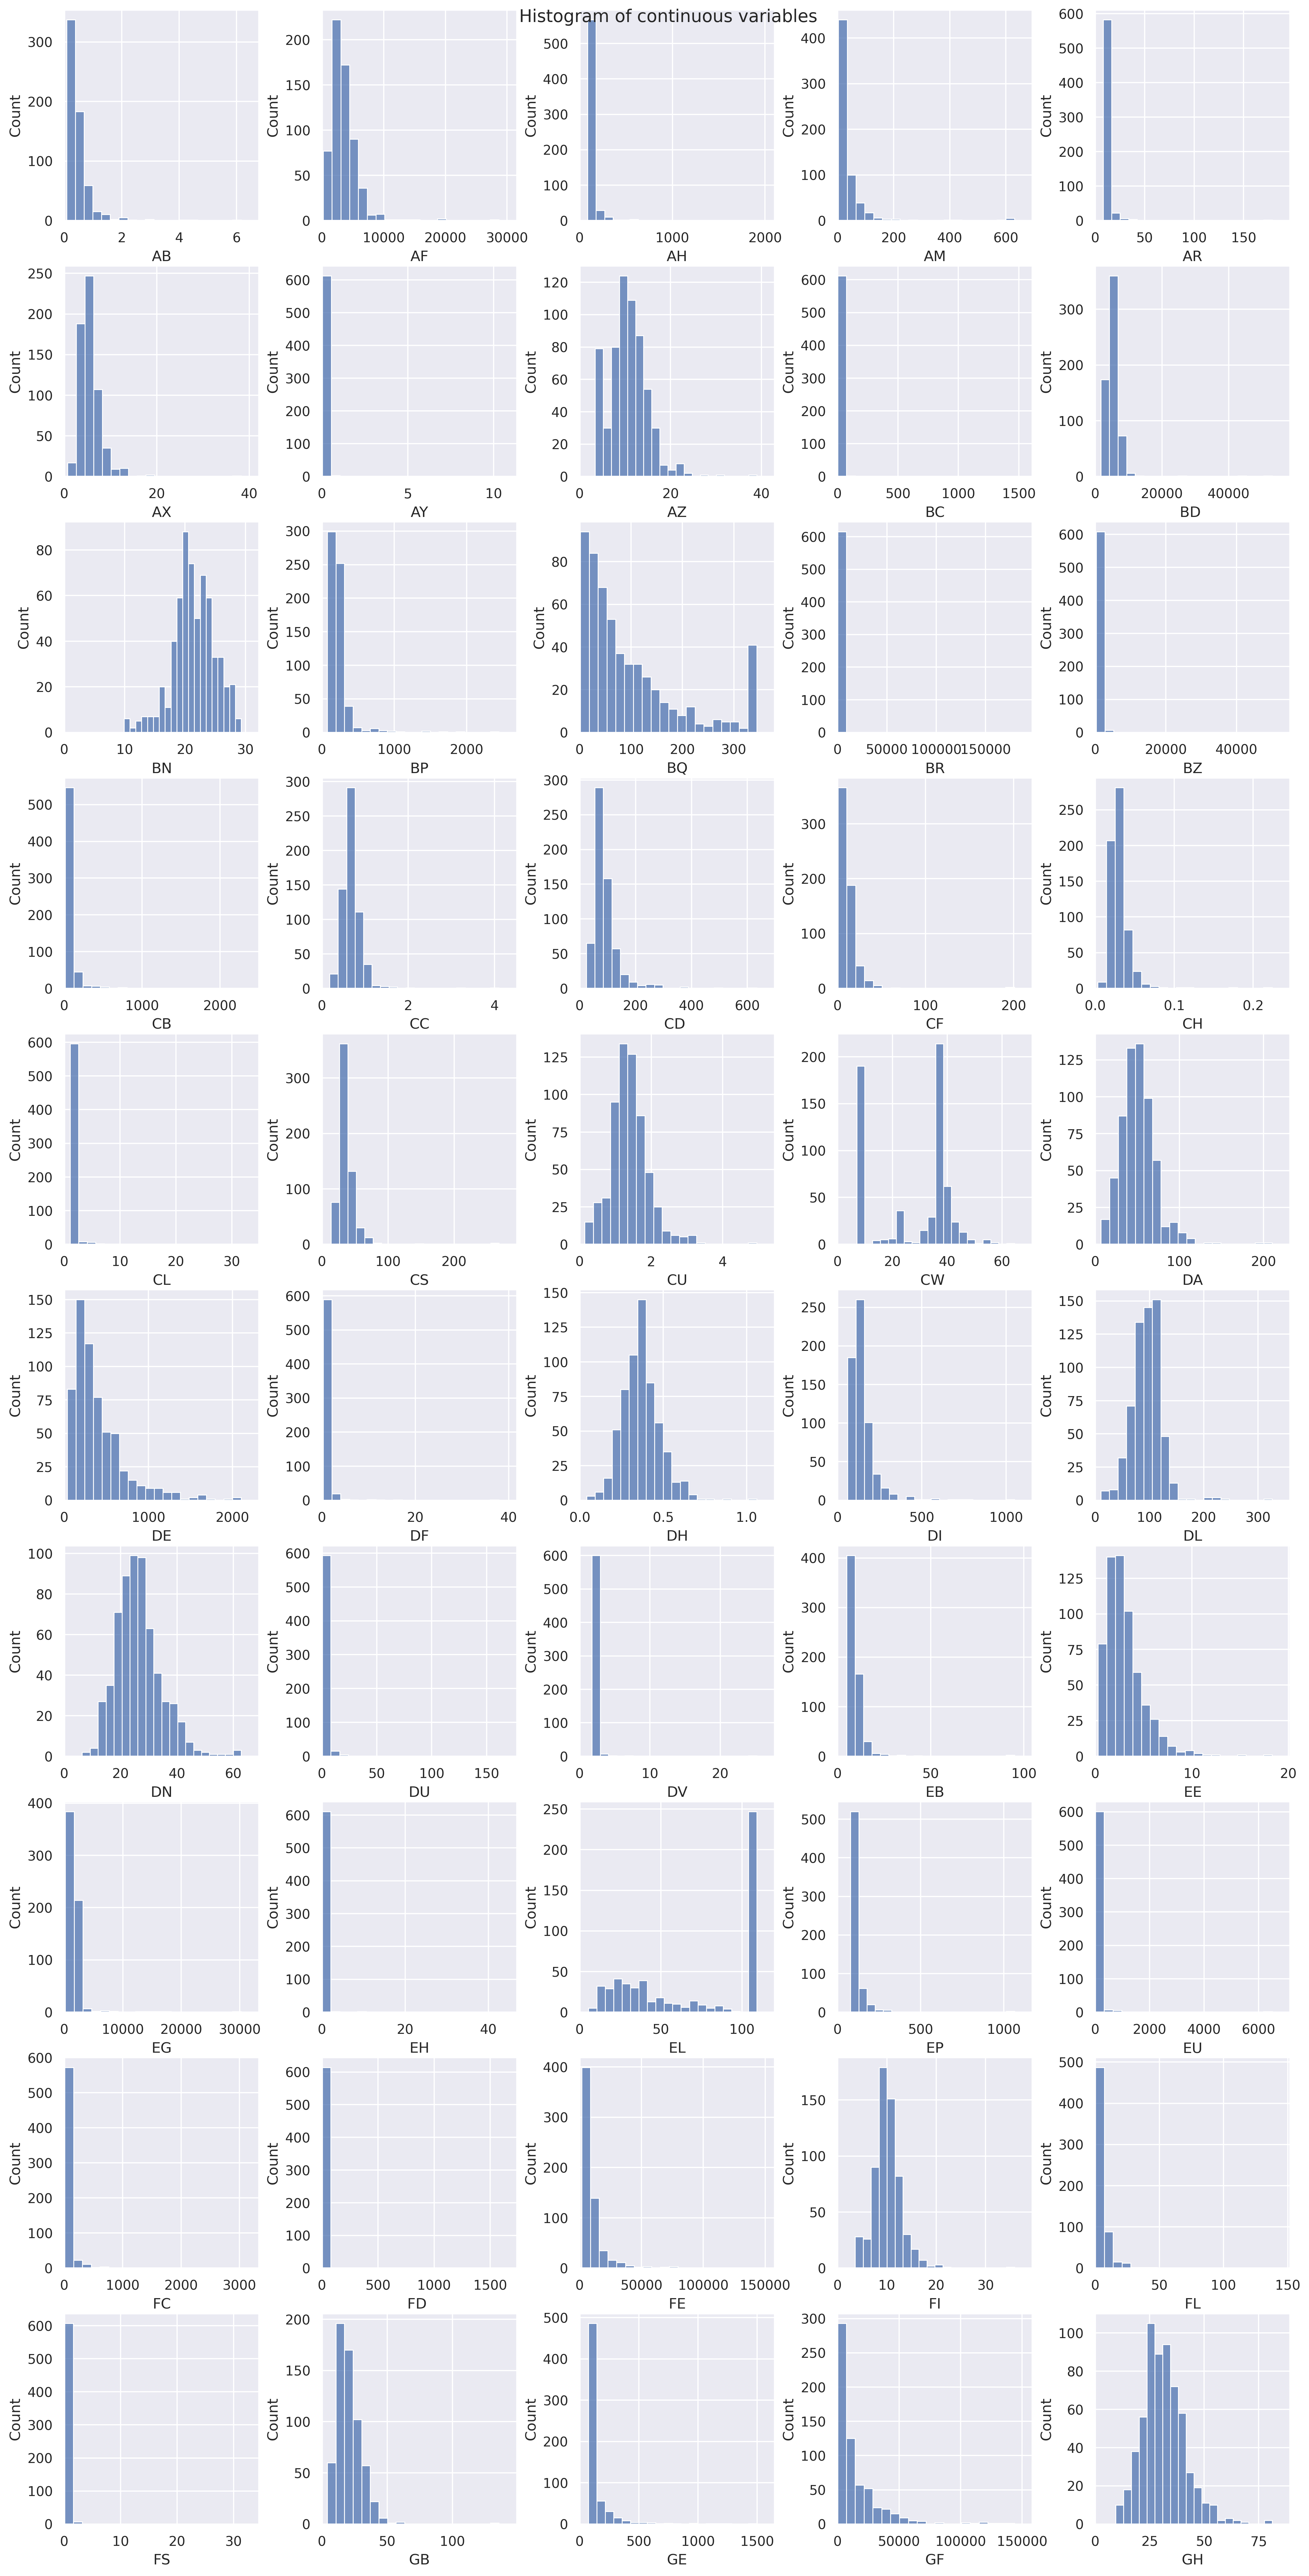

In [14]:
NUM_PLOT_COLUMNS = 5
USE_HISTOGRAM = True 

plt.figure().clear()

fig, axes = plt.subplots(int(num_signal_columns/NUM_PLOT_COLUMNS), NUM_PLOT_COLUMNS, figsize=(15, 30), sharey=False)
fig.suptitle('Distibution of continuous variables')
fig.tight_layout() 

idrow = -1
for idx, col in enumerate(signal_correlation_columns):

    idcol = int(np.mod(idx, NUM_PLOT_COLUMNS))
    idrow = idrow + 1 if idcol == 0 else idrow
    
    if USE_HISTOGRAM:
        sns.histplot(ax=axes[idrow, idcol], data = df_icr, x = col, bins = 20)
    else:
        sns.boxplot(ax=axes[idrow, idcol], data = df_icr, x = col)

    axes[idrow, idcol].set_xlim(0, np.max(df_icr[col]) * 1.1)


As we can see, we have some outliers on some variables, and others appear to be discrete rather than continuous. We are going to define which of those are numerical initially before doing any extra modification on the data.

Letś first chekck for outliers doing a boxplot

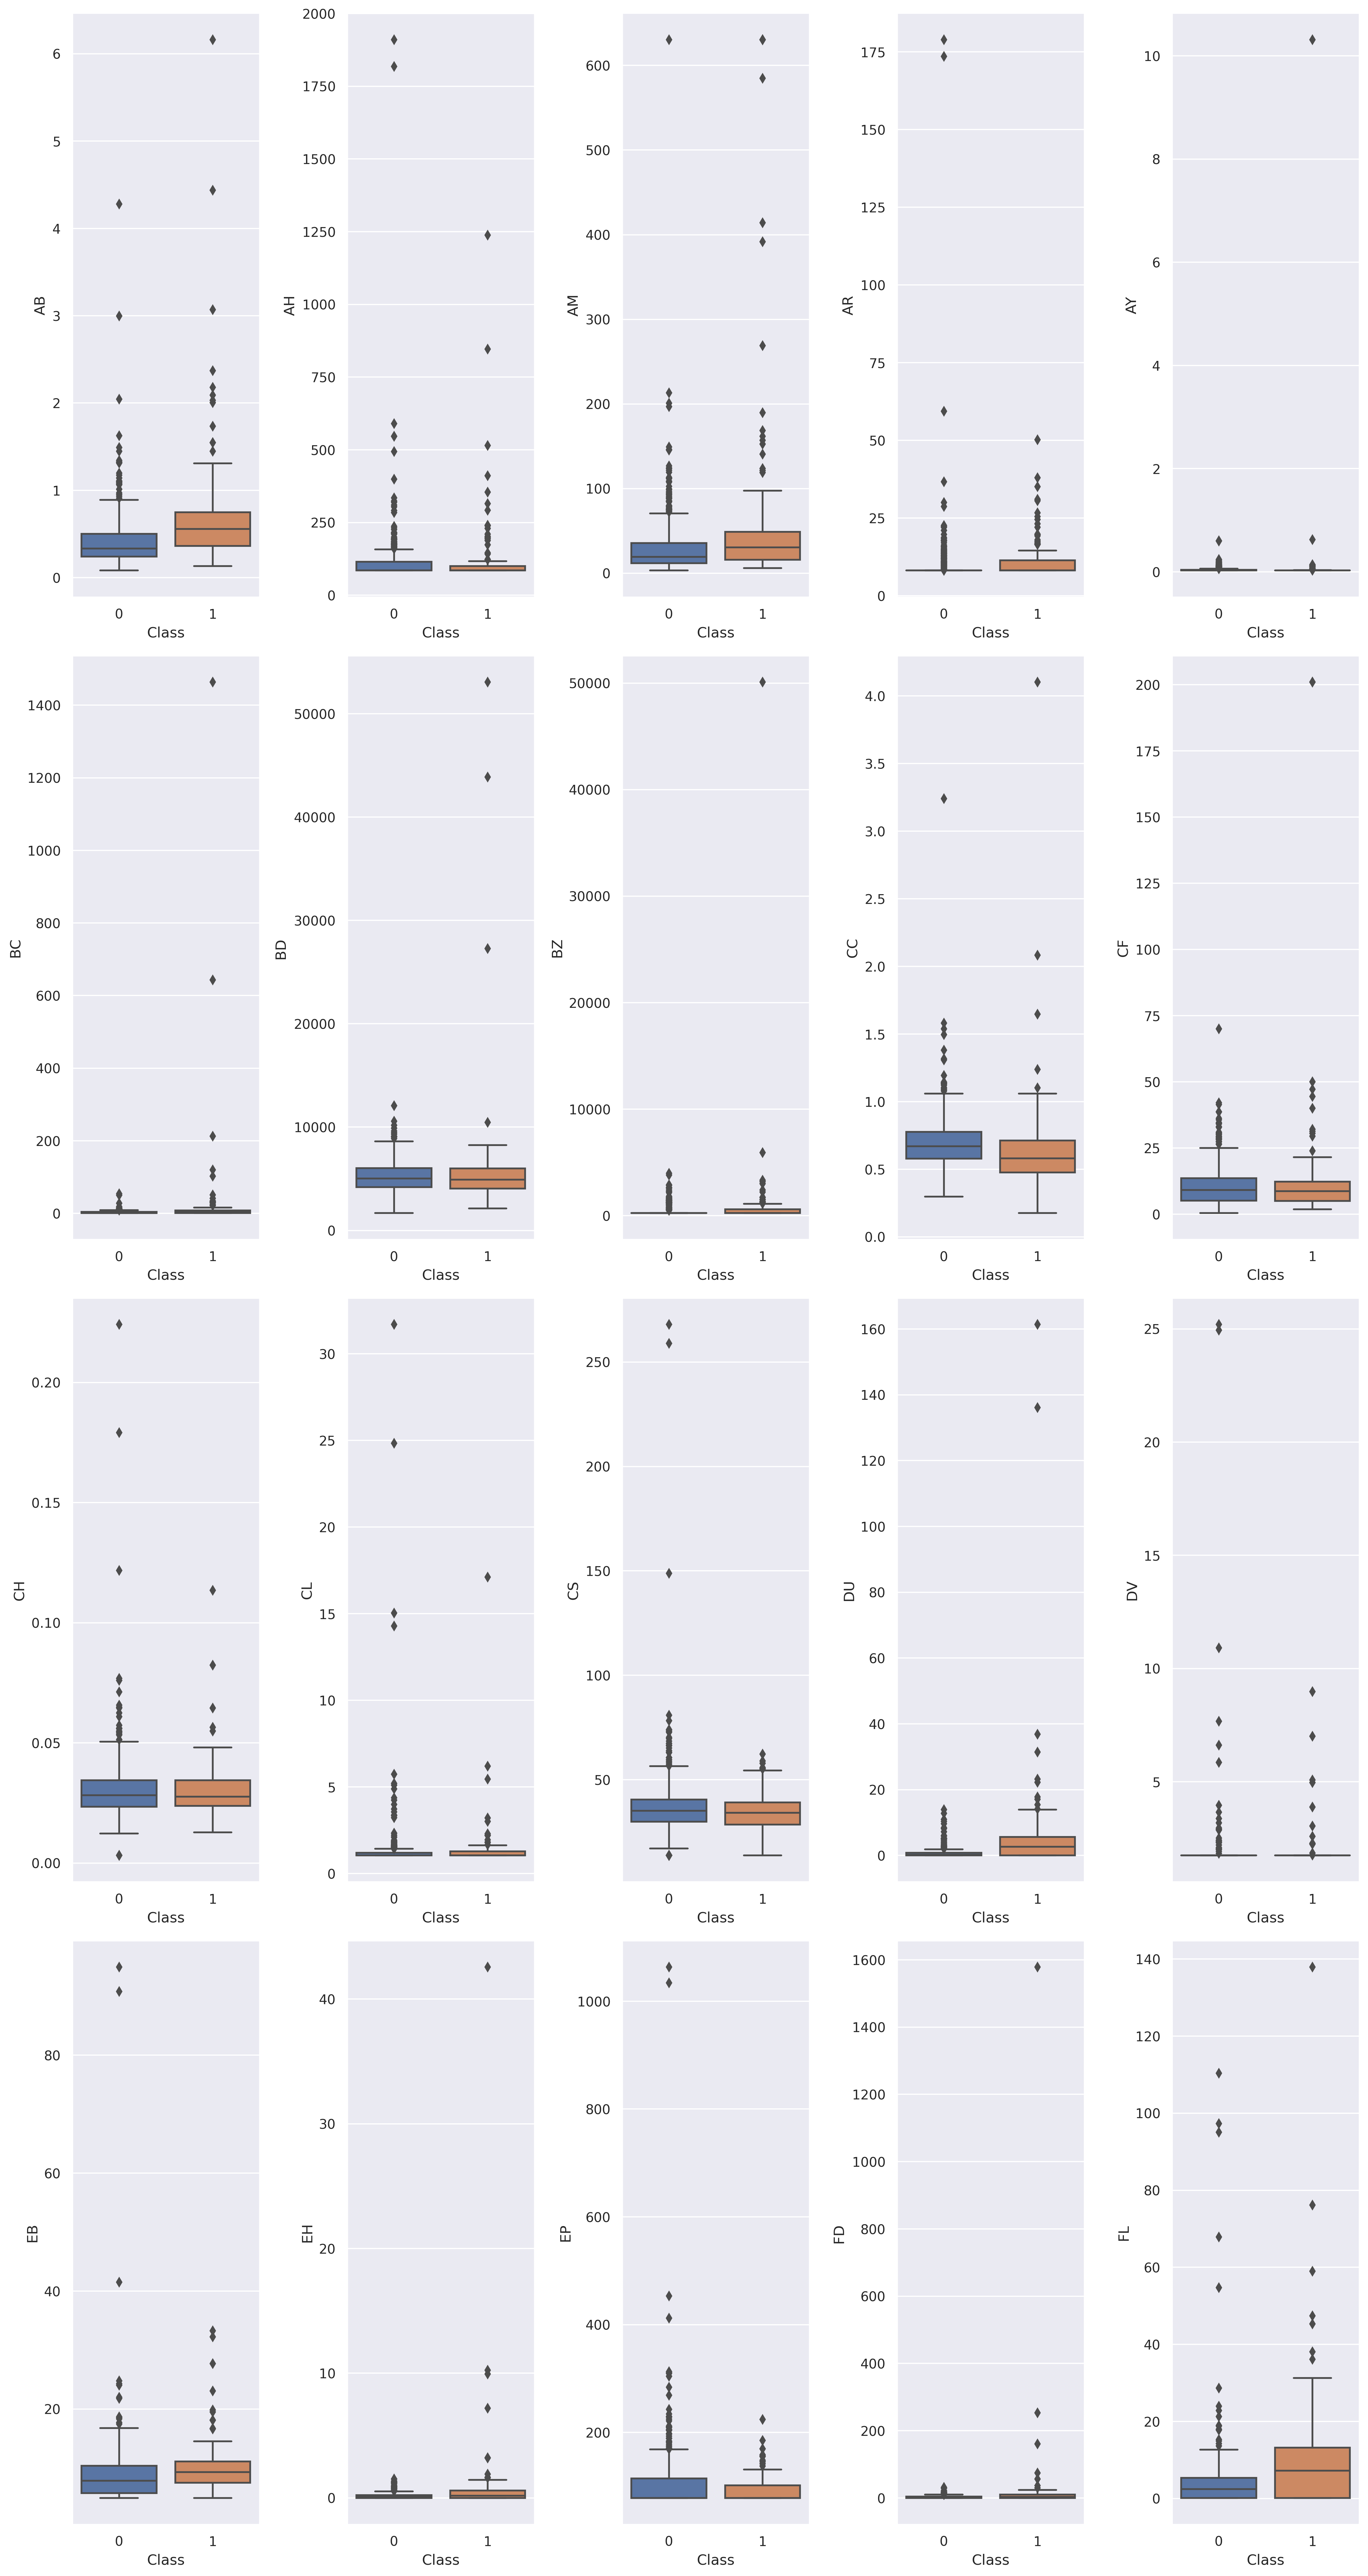

In [28]:
# Checking for Outliers
fig, ax = plt.subplots(4, 5, figsize=(16,30))

for idx, col in enumerate(signal_correlation_columns):
    sns.boxplot(x="Class",y=col,data=df_icr, ax=ax[int(idx/5), idx % 5])

# Adjust the vertical spacing between subplots    
plt.tight_layout()

plt.show()

In [ ]:
# continuous_features = ['AF', ]
# discrete_features = ['AB', 'AH', 'AM', 'BZ', 'EU', 'GL']

# # num_plot_columns = 3

# # plt.figure().clear()
# # fig, axes = plt.subplots(int(len(discrete_features)/num_plot_columns), 
# #                          num_plot_columns, figsize=(15, 5), sharey=True)
# # fig.suptitle('Histogram of discrete variables')
# # fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

# # idrow = -1
# # for idx, col in enumerate(discrete_features):
# #     idcol = int(np.mod(idx, num_plot_columns))
# #     if idcol == 0:
# #         idrow += 1  
# #     sns.histplot(ax=axes[idrow, idcol], data = df_icr, x = col, bins = 20)
# #     # sns.countplot(ax=axes[idrow, idcol], data = df_icr, x = col)

# #     # axes[idrow, idcol].set_title(col)

# fig, ax = plt.figure()

# sns.histplot(data = df_icr, x = col, bins = 50)
# ax.set_xlim(0, 5)


## Data preprocessing

We are going to use a scikit-learn [Pipeline]() to structure our preprocessing. The reason to use a Pipeline is because we will need to conduct the same transformations conducted in the train set into the test set. By storing them in a Pipeline, it is easier to retrieve the transformation when the test set is provided. In the context of machine learning in production, it is saved to conduct the same transformations when new data arrives.

The preprocessing is going to follow these steps:

- Imputation of missing values with `KNNImputer`. The reason for using `KNNimputer` is to avoid changing the underlying distribution of the feature. Alternative imputation methods involve using the mean for the values imputed, but that decreases the variance of the feature and might distort the relationship between variables.
- Scale columns from 0-1 using `MixMaxScaler`. This should help the model to converge faster and potentially offering better results.
- Change categorical columns into ordinal numbers. 

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output = "pandas")

numerical_features   = features[X_train.dtypes == "float"]
categorical_features = features[X_train.dtypes == "object"]

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()), 
    ('scaler', MinMaxScaler()),
    ])
    

categorical_transformer = Pipeline(steps=[
    ('categorizer', OrdinalEncoder()),
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features),
])

data_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_transformed = data_pipeline.fit_transform(X_train)
X_train_transformed

TypeError: set_config() got an unexpected keyword argument 'transform_output'

The preprocessing has been conducted in the train set. We should check that the missing values have been addressed. We do this in the next cell.

In [ ]:
total_nans = X_train_transformed.isna().sum().sum()
print(f"There are {total_nans} nans in the transformed dataset.")

We should also examine that the scaling has worked properly by taking al ook at the first rows of the `X_train_transformed` variable

In [ ]:
X_train_transformed.head(10)

In [ ]:
X_train.head(10)

Check the balance of the records to make sure that the evaluation of the ML model takes the weights into account

In [ ]:
positive_records = y_train.sum()
negative_records = (y_train == 0).sum()
positive_records, negative_records
# X_test_transformed = data_pipeline.fit_transform(X_test)
# X_test_transformed.head()
positive_weight = negative_records / positive_records
print('y Estimate: %.3f' % positive_weight)


## Split the data

Since we only have a train set and we do not really have a test set, we need to 'create' an evaluation set for the data we are going to be training. 

In addition, we need to ensure that the train and validation sets are split correctly regargding the output variable. Otherwise, we could end up in a Class distribution of 7:1 ratio for the train set and 3:2 for the validation set. This would cause most likely overfitting as the model could predict well the train set but not well on the validation set.

In [ ]:
# Leave an out of fold sample
from sklearn.model_selection import train_test_split

seed = 42
validation_size = 0.15
X_train, X_validation, y_train, y_validation = train_test_split(X_train_transformed, y_train, 
                                                                test_size = validation_size,
                                                                random_state = seed, stratify=y_train)

ec1_eval_set = [(X_train, y_train), (X_validation, y_validation)]

In [ ]:
correlation_features_transformed = X_train_transformed.corr()
correlation_features_transformed[np.abs(correlation_features_transformed) > 0.3].sum() 

# sns.heatmap(correlation_features_transformed[np.abs(correlation_features_transformed) > 0.3])

sns.heatmap(correlation_features[np.abs(correlation_features) > 0.3])

## Train first ML Models

Until now, we have conducted data exploration, preprocessed adequately by scaling and imputing missing values, and split them in a way that the class distribution is preserved between sets.

After all these steps, we can build our first machine learning models. 

The performance of the model will be measured using `balanced_log_loss`, which is defined in the next cell. This type of loss function takes into account the imbalance of the data and penalizes the wrong predictions for class 1.

We will try to fit certain algorithms and eventually we will use an ensemble model.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, confusion_matrix, log_loss, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb


# Use balanced log loss as metric
def balanced_log_loss(y_true, y_pred):
    nc = np.bincount(y_true)
    return log_loss(y_true, y_pred, sample_weight = 1/nc[y_true], eps=1e-15)


In [ ]:
params = {
    # 'base_score'       : [0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95],
    # "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "n_estimators"     : [100, 200, 300, 400, 500, 600, 800, 1000],
    "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
    # 'min_samples_split': [0.10, 0.12, 0.15, 0.17, 0.20, 0.22, 0.25]
    # "min_child_weight" : [1, 3, 5, 7],
    # "gamma"            : [ 0.0, 0.1, 0.2, 0.3, 0.4],
    # "colsample_bytree" : [ 0.3, 0.4, 0.5, 0.7],
}

classifier = xgb.XGBClassifier(random_state = seed, scale_pos_weight = positive_weight)
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter = 5, scoring = make_scorer(balanced_log_loss, greater_is_better=True),
                                  n_jobs = -1, cv = 5, verbose = 3)
random_search.fit(X_train, y_train)


In [ ]:
random_search.best_estimator_
random_search.best_params_



In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, cross_val_score

xgb_clf = random_search.best_estimator_

xgb_score = cross_val_score(xgb_clf, X_train, y_train, cv = 5, groups = y_train, scoring = make_scorer(balanced_log_loss, greater_is_better=True))
print(f"Score from cross_val_score is: {list(map('{:.2f}'.format,xgb_score))}")

np.mean(xgb_score)



Check that the results of the out of fold are consistent with the cross-validation scores

In [ ]:
y_pred_oof = xgb_clf.predict(X_validation)
score_oof = balanced_log_loss(y_validation, y_pred_oof)
score_oof

### Try other classifiers

Some people during the Kaggle competition reported the successful use of lightgbm and catboost. We will use them in the next cells


In [ ]:
import lightgbm as lgb
import optuna
# import shap

lgbm_clf = lgb.LGBMClassifier(n_estimators=150,
                        learning_rate=0.1,
                        num_leaves=10,
                        max_depth=4,
                        subsample = 0.9,
                        colsample_bytree = 0.3,
                        subsample_freq = 3,
                        min_split_gain = 0.1,
                        min_child_weight = 0.0005,
                        min_child_samples = 20,
                        reg_lambda = 0.01,
                        reg_alpha = 0.1,
                        objective = 'binary',
                        class_weight = 'balanced',
                        random_state=seed)

lgbm_clf.fit(X_train, y_train)

score_lgbm = cross_val_score(lgbm_clf, X_train, y_train, cv=5, n_jobs=-1, 
                             scoring = make_scorer(balanced_log_loss, greater_is_better=True))
score_lgbm



In [ ]:

svc_clf = SVC(random_state=seed, degree= 3, probability= True)
svc_clf.fit(X_train, y_train)

score_svc = cross_val_score(svc_clf, X_train, y_train, cv=5, n_jobs=-1, 
                            scoring = make_scorer(balanced_log_loss, greater_is_better=True))
score_svc



In [ ]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(
    iterations = 250,
    learning_rate = 0.04525759098022261,
    depth = 7, # depth above 10 usually introduces overfitting
    l2_leaf_reg = 7.82,
    early_stopping_rounds = 3,
    auto_class_weights = 'Balanced',
    loss_function = 'Logloss',
    verbose = 0,
)

catboost_clf.fit(X_train, y_train)
score_catboost = cross_val_score(catboost_clf, X_train, y_train, cv=5, n_jobs=-1, 
                                 scoring = make_scorer(balanced_log_loss, greater_is_better=True))
score_catboost

# best_hyperparams_cat  = {'iterations': 245, 'learning_rate': 0.04525759098022261, 'depth': 7, 'l2_leaf_reg': 7.822788431713332, 'early_stopping_rounds': 3}

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = seed, 
                                criterion= 'log_loss', 
                                max_depth=7, class_weight= 'balanced')

rf_clf.fit(X_train, y_train)
score_rf = cross_val_score(rf_clf, X_train, y_train, cv=5, n_jobs=-1, 
                           scoring = make_scorer(balanced_log_loss, greater_is_better=True))
score_rf

### Stacking classifier



In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('LogisticRegression', LogisticRegression(max_iter=10000)), #doesn't converge
    ('RandomForestClassifier', rf_clf),
    ('CatBoostClassifier', catboost_clf),
    ('XGBClassifier',  xgb_clf),
    # ('LGBMClassifier', lgbm_clf)
]

stacked_clf = StackingClassifier(estimators=estimators, 
                                   final_estimator=lgbm_clf
                                   )

stacked_clf.fit(X_train, y_train)
stacked_score = cross_val_score(stacked_clf, X_train, y_train, cv=5, n_jobs=-1, 
                                scoring = make_scorer(balanced_log_loss, greater_is_better=True))


In [ ]:
stacked_score.mean()

In [ ]:
print(f"Stacked score is {stacked_score}")

y_pred_oof_stacked = stacked_clf.predict(X_validation)
score_oof_stacked = balanced_log_loss(y_validation, y_pred_oof_stacked)
score_oof_stacked

Letś plot the importance of the tree model and the tree itself

### Inference with Test Data

Once we have classified our train model, we will classify our test data. 

Here is when we have to use again the same pipeline used in the train set to transform the data on the test set. 

In [ ]:
test_data = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv", index_col="Id")
test_data

X_test = test_data[features]

X_test_transformed = data_pipeline.transform(X_test)


In [ ]:

# Fit Model to test data
clf = stacked_clf
y_pred = clf.predict_proba(X_test_transformed)
y_pred

submission_df = pd.DataFrame(y_pred, columns=['class_0', 'class_1'], 
                             index=X_test_transformed.index)
submission_df.reset_index(inplace=True)
submission_df



In [ ]:
submission_df.to_csv("/kaggle/working/submission.csv", index=False)